In [1]:
import os
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

from matplotlib import rcParams
sns.set(style="darkgrid")
sns.set_context("poster")


# Data Dictionary for future use:

# L0:

#1 High Income, expensive child
#2 Very Important Provincials
#3 High status seniors
#4 Affluent senior apartments
#5 Mixed seniors
#6 Career and childcare
#7 Dinki's (double income no kids)
#8 Middle class families
#9 Modern, complete families
#10 Stable family
#11 Family starters
#12 Affluent young families
#13 Young all american family
#14 Junior cosmopolitan
#15 Senior cosmopolitans
#16 Students in apartments
#17 Fresh masters in the city
#18 Single youth
#19 Suburban youth
#20 Etnically diverse
#21 Young urban have-nots
#22 Mixed apartment dwellers
#23 Young and rising
#24 Young, low educated 
#25 Young seniors in the city
#26 Own home elderly
#27 Seniors in apartments
#28 Residential elderly
#29 Porchless seniors: no front yard
#30 Religious elderly singles
#31 Low income catholics
#32 Mixed seniors
#33 Lower class large families
#34 Large family, employed child
#35 Village families
#36 Couples with teens 'Married with children'
#37 Mixed small town dwellers
#38 Traditional families
#39 Large religous families
#40 Large family farms
#41 Mixed rurals

# L1:

#1 20-30 years
#2 30-40 years
#3 40-50 years
#4 50-60 years
#5 60-70 years
#6 70-80 years

# L2:

#1 Successful hedonists
#2 Driven Growers
#3 Average Family
#4 Career Loners
#5 Living well
#6 Cruising Seniors
#7 Retired and Religeous
#8 Family with grown ups
#9 Conservative families
#10 Farmers

# L3:

#0 0%
#1 1 - 10%
#2 11 - 23%
#3 24 - 36%
#4 37 - 49%
#5 50 - 62%
#6 63 - 75%
#7 76 - 88%
#8 89 - 99%
#9 100%

# L4:

#0 f 0
#1 f 1 ñ 49
#2 f 50 ñ 99
#3 f 100 ñ 199
#4 f 200 ñ 499
#5 f 500 ñ 999
#6 f 1000 ñ 4999
#7 f 5000 ñ 9999
#8 f 10.000 - 19.999
#9 f 20.000 - ?

In [2]:
df_train = pd.read_csv('tic_2000_train_data.csv')

In [3]:
df_train.keys()

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [4]:
import sweetviz
#get quick descriptive summary of info

#for more info on package, please see: https://github.com/fbdesignpro/sweetviz
#create quick copy for ease of use
report_data = pd.DataFrame.copy(df_train)

In [5]:
#rename cols for prelim report ease
report_data.rename(columns={'MOSTYPE': 'Customer Subtype L0', 'MAANTHUI':'Number of houses 1 ñ 10', 'MGEMOMV' : 'Avg size household 1 ñ 6',
                   'MGEMLEEF':'Avg age see L1', 'MOSHOOFD': 'Customer main type see L2', 'MGODRK': 'Roman catholic see L3',
                   'MGODPR': 'Protestant','MGODOV' : 'Other religion', 'MGODGE': 'No religion','MRELGE' :'Married',
                   'MRELSA' : 'Living together','MRELOV' : 'Other relation','MFALLEEN' : 'Singles','MFGEKIND' : 'Household without children',
                   'MFWEKIND' : 'Household with children','MOPLHOOG' : 'High level education','MOPLMIDD' : 'Medium level education',
                   'MOPLLAAG' : 'Lower level education','MBERHOOG' : 'High status','MBERZELF' : 'Entrepreneur','MBERBOER' : 'Farmer',
                   'MBERMIDD' : 'Middle management','MBERARBG' : 'Skilled labourers','MBERARBO' : 'Unskilled labourers',
                   'MSKA' : 'Social class A','MSKB1' : 'Social class B1','MSKB2' : 'Social class B2','MSKC' : 'Social class C',
                   'MSKD' : 'Social class D','MHHUUR' : 'Rented house','MHKOOP' : 'Home owners','MAUT1' : '1 car','MAUT2' : '2 cars',
                   'MAUT0' : 'No car','MZFONDS' : 'National Health Service','MZPART' : 'Private health insurance','MINKM30' : 'Income < 30.000',
                   'MINK3045' : 'Income 30-45.000','MINK4575' : 'Income 45-75.000','MINK7512' : 'Income 75-122.000','MINK123M' : 'Income >123.000',
                   'MINKGEM' : 'Average income','MKOOPKLA' : 'Purchasing power class','PWAPART' : 'Contribution private third party insurance see L4','PWABEDR' : 'Contribution third party insurance (firms)',
                   'PWALAND' : 'Contribution third party insurance (agriculture)','PPERSAUT' : 'Contribution car policies','PBESAUT' : 'Contribution delivery van policies',
                   'PMOTSCO' : 'Contribution motorcycle/scooter policies','PVRAAUT' : 'Contribution lorry policies','PAANHANG' : 'Contribution trailer policies',
                   'PTRACTOR' : 'Contribution tractor policies','PWERKT' : 'Contribution agricultural machines policies','PBROM' : 'Contribution moped policies',
                   'PLEVEN' : 'Contribution life insurances','PPERSONG' : 'Contribution private accident insurance policies',
                   'PGEZONG' : 'Contribution family accidents insurance policies','PWAOREG' : 'Contribution disability insurance policies','PBRAND' : 'Contribution fire policies',
                   'PZEILPL' : 'Contribution surfboard policies','PPLEZIER' : 'Contribution boat policies','PFIETS' : 'Contribution bicycle policies',
                   'PINBOED' : 'Contribution property insurance policies','PBYSTAND' : 'Contribution social security insurance policies','AWAPART' : 'Number of private third party insurance 1 - 12',
                   'AWABEDR' : 'Number of third party insurance (firms)','AWALAND' : 'Number of third party insurance (agriculture)','APERSAUT' : 'Number of car policies',
                   'ABESAUT' : 'Number of delivery van policies','AMOTSCO' : 'Number of motorcycle/scooter policies', 'AVRAAUT' : 'Number of lorry policies','AAANHANG': 'Number of trailer policies',
                   'ATRACTOR' : 'Number of tractor policies','AWERKT' : 'Number of agricultural machines policies','ABROM' : 'Number of moped policies',
                   'ALEVEN' : 'Number of life insurances', 'APERSONG' : 'Number of private accident insurance policies','AGEZONG' : 'Number of family accidents insurance policies',
                   'AWAOREG' : 'Number of disability insurance policies','ABRAND' :'Number of fire policies','AZEILPL' :'Number of surfboard policies','APLEZIER' :'Number of boat policies',
                   'AFIETS' :'Cycle_p','AINBOED' :'Prop_p','ABYSTAND' :'SS_p','CARAVAN' :'MHome_p'},
          inplace=True)

In [6]:
cfg = sweetviz.FeatureConfig(force_cat=["Customer Subtype L0",
                                       "Avg age see L1", "Customer main type see L2",
                                       "Roman catholic see L3","Contribution private third party insurance see L4"])
report_prelim= sweetviz.analyze([report_data, "Train"], target_feat= "MHome_p", feat_cfg = cfg)

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:22  -> (00:00 left)


Creating Associations graph... DONE!


In [7]:
report_prelim.show_html("Report_prelim.html")

In [8]:
#take note of the features which explain the details of CARAVAN. There are 14 main features that explain atleast 60% of our target:

#1) Contribution car policies 0.07
#2) Contribution fire policies 0.05
#3) Number of car policies 0.05
#4) Customer Subtype L0 0.05
#5) Customer main type see L2 0.03
#6) Average income 0.03
#7) Purchasing power class 0.03
#8) Income < 30.000 0.02
#9) Lower level education 0.02
#10) Contribution private third party insurance see L4 0.02
#11) No car 0.02
#12) Number of private third party insurance 1 - 12 0.02
#13) Rented house 0.02
#14) Home owners 0.02

# Using PCA to find features

In [9]:
from sklearn.preprocessing import StandardScaler
features = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']
# Separating out the features
x = df_train.loc[:, features].values
# Separating out the target
y = df_train.loc[:,['CARAVAN']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

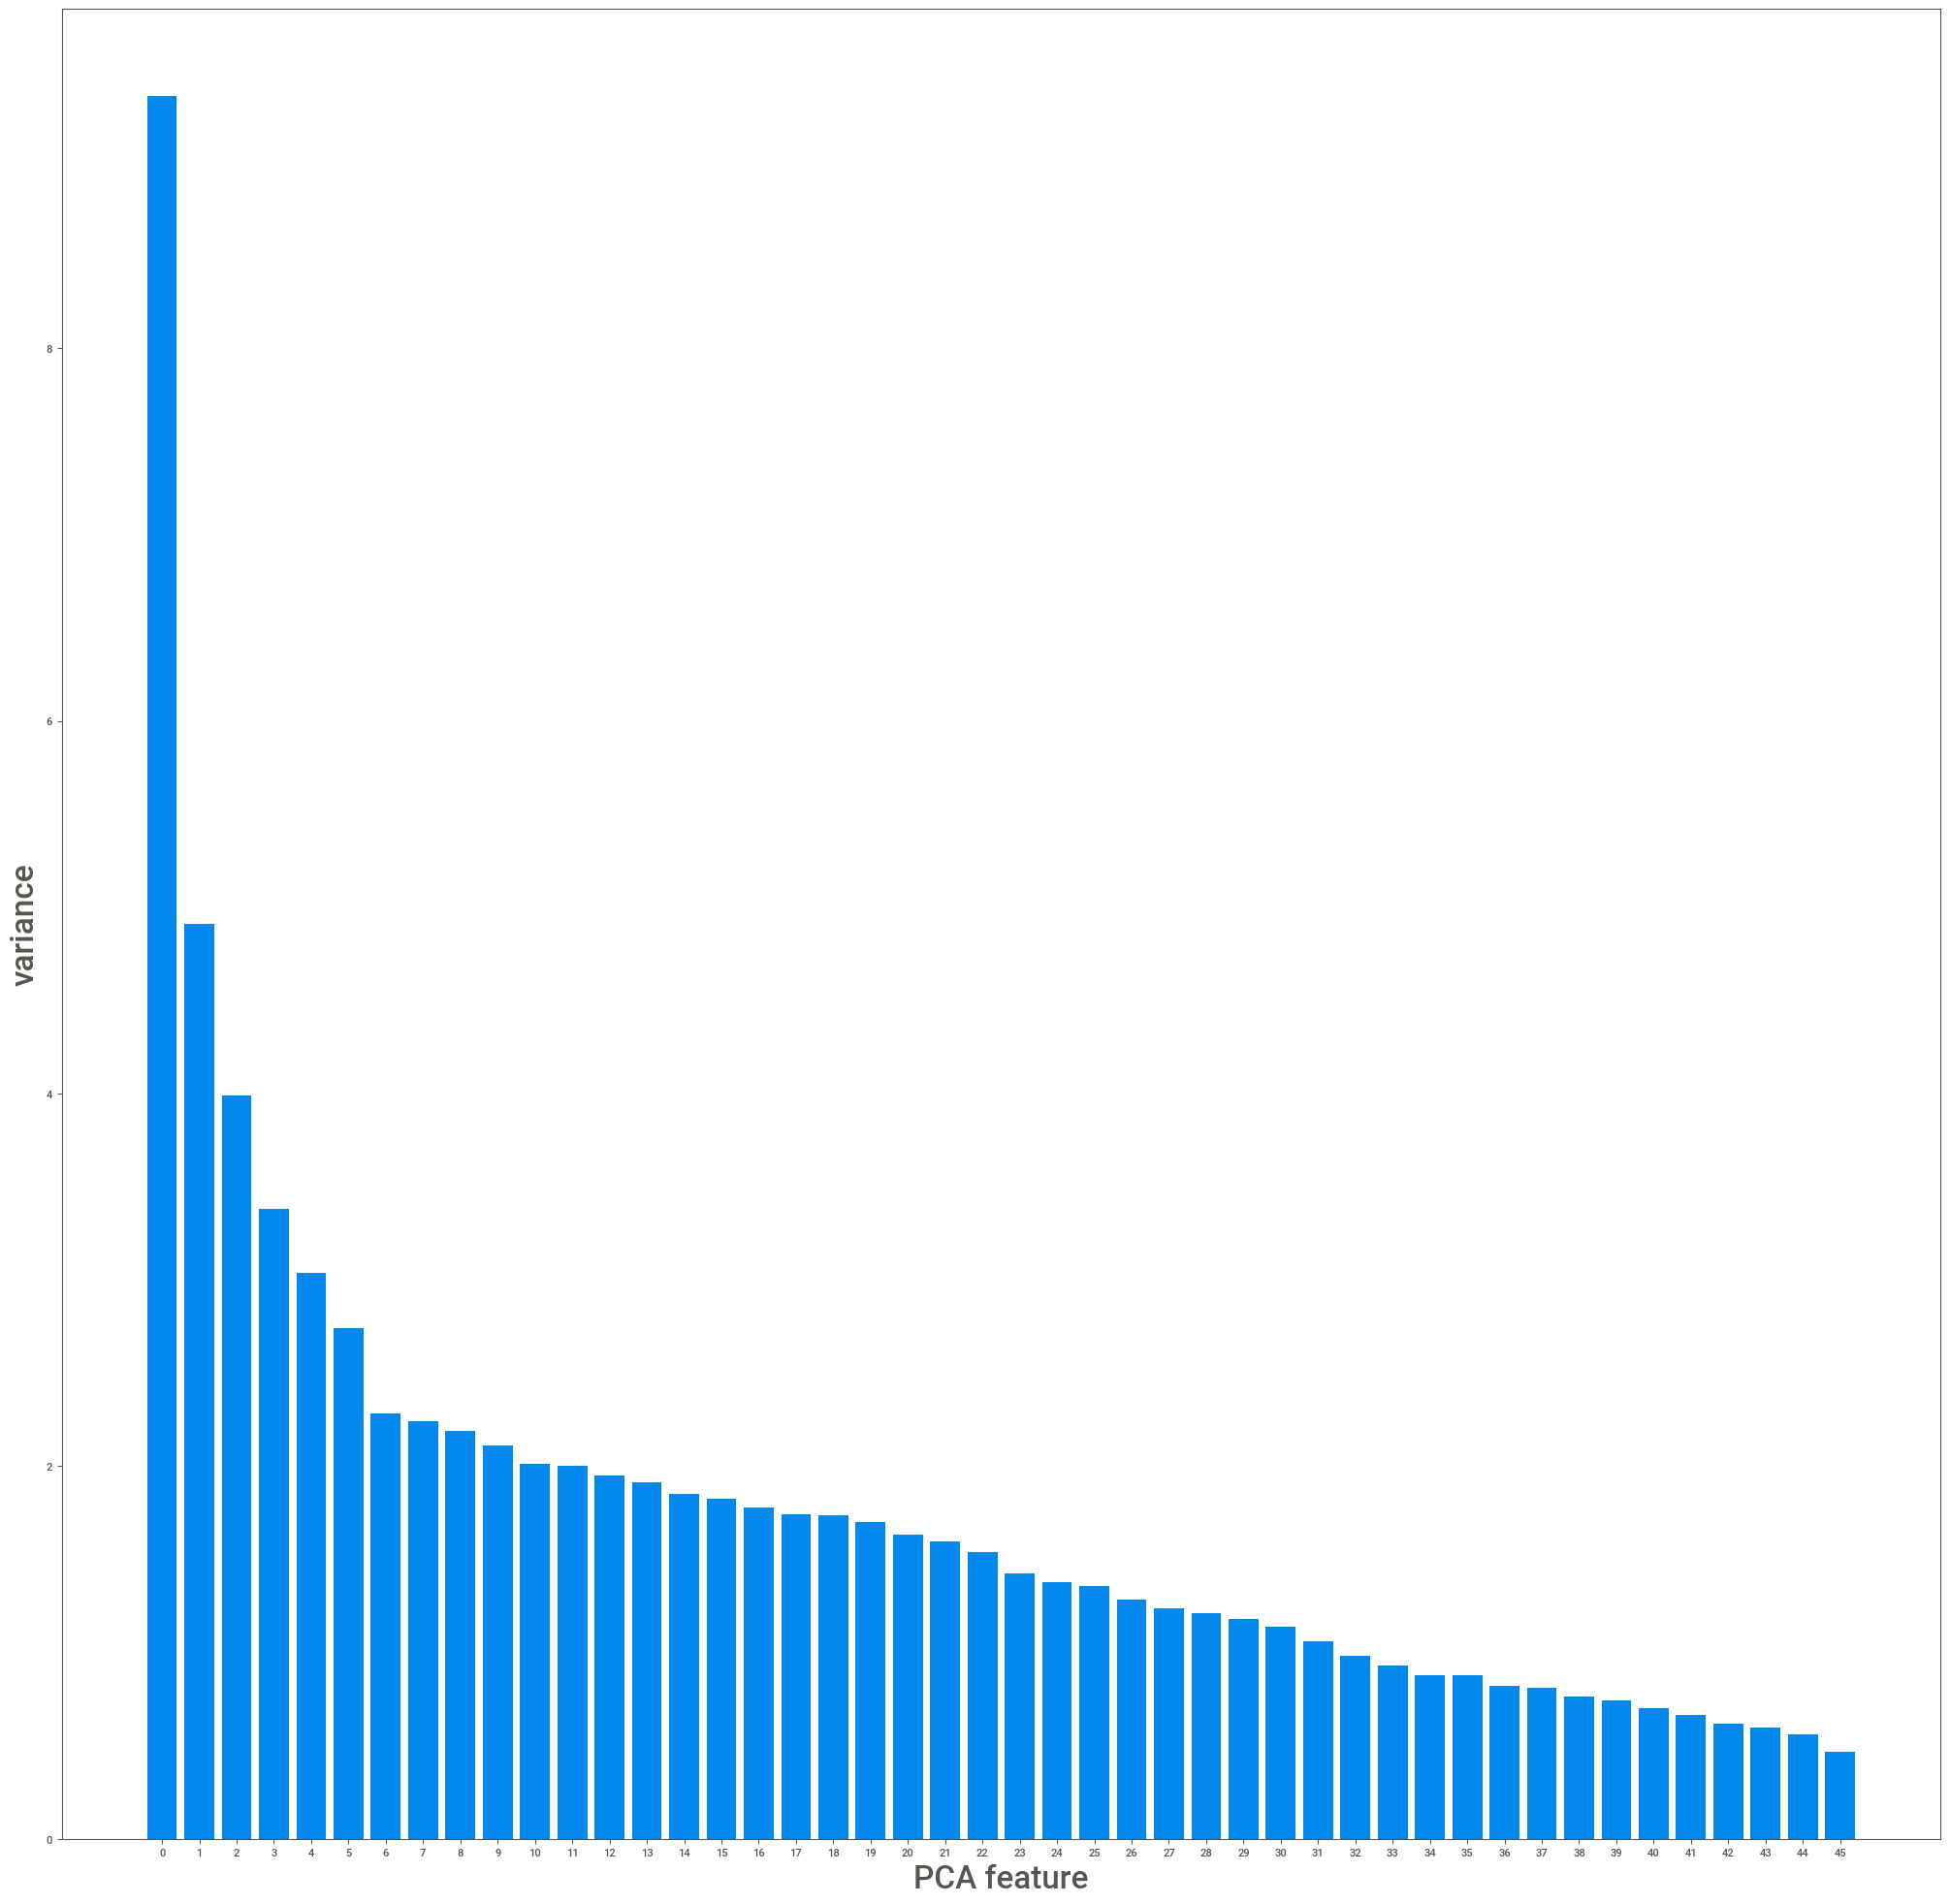

In [10]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create a PCA instance with 95% of the variation explaining the data
pca = PCA(.95)

# Fit the data
principalDf = pca.fit_transform(x)

# Plot the explained variances
features_n = range(pca.n_components_)

plt.figure(figsize=[25,25])
plt.bar(features_n, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features_n)
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.1100152 , 0.05778628, 0.04692978, 0.0397625 , 0.03572165,
       0.03225938, 0.02683512, 0.02635834, 0.02575003, 0.02480987,
       0.02367001, 0.02353773, 0.02295952, 0.02251175, 0.0217534 ,
       0.02144571, 0.02090392, 0.02050599, 0.02041063, 0.0199851 ,
       0.01917658, 0.01876783, 0.018087  , 0.01674516, 0.01619929,
       0.01596461, 0.01507047, 0.01454801, 0.01421246, 0.01388223,
       0.01339942, 0.01249422, 0.01157735, 0.010955  , 0.01034402,
       0.01031865, 0.00962969, 0.0095093 , 0.00896643, 0.0087297 ,
       0.00821577, 0.00783597, 0.00727101, 0.00702674, 0.00656288,
       0.00551365])

In [12]:
pca.explained_variance_ratio_.sum()

0.9549153406217402

In [13]:
#46 components explains 95% of the data

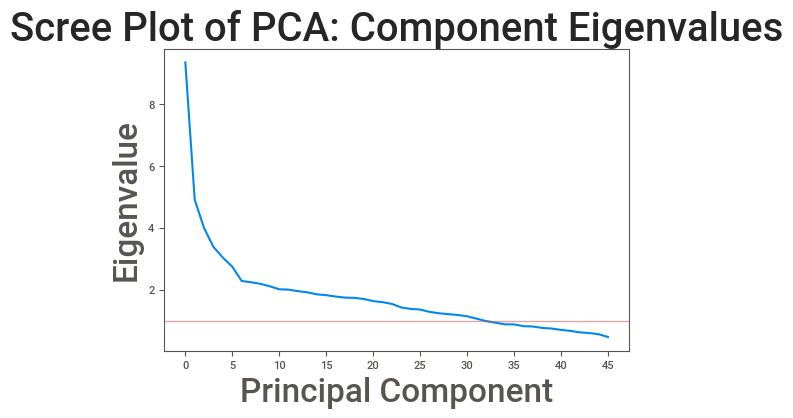

In [14]:
#check the Kaiser criterion for rough estimate to see if these can be trimmed back at all.

def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

In [15]:
#According to the Kaiser criterion above, a better number of components is between 30 - 35 to prevent overfitting to a degree

In [16]:
#We will use the 95% value for the new dataframe

In [17]:
prin_Df=pd.DataFrame(data = principalDf, 
                     columns = ['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10','pc_11','pc_12','pc_13','pc_14',
                         'pc_15','pc_16','pc_17','pc_18','pc_19','pc_20','pc_21','pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28',
                         'pc_29','pc_30','pc_31','pc_32','pc_33','pc_34','pc_35','pc_36','pc_37','pc_38','pc_39','pc_40','pc_41','pc_42','pc_43','pc_44','pc_45','pc_46'])

In [18]:
prin_Df.shape

(5822, 46)

In [19]:
y.shape

(5822, 1)

In [20]:
X = np.array(prin_Df)
Y = np.array(y)

# Train the data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [22]:
y_train.shape

(4657, 1)

In [23]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4657, 46)
Training Labels Shape: (4657, 1)
Testing Features Shape: (1165, 46)
Testing Labels Shape: (1165, 1)


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
model_rf = rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

In [27]:
len(prin_Df)

5822

In [25]:
y_pred

array([0.004 , 0.056 , 0.02  , ..., 0.04  , 0.1925, 0.02  ])

In [28]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = prin_Df.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [6]:
#
df1 = df.query("CARAVAN > 0")
print (df1)

      MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
41         11         1        3         3         3       2       7       0   
45         38         1        3         3         9       0       5       1   
57         12         1        3         2         3       0       6       0   
97          9         1        2         3         3       0       6       1   
98         36         1        2         4         8       2       4       2   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5756        6         1        5         3         2       2       4       0   
5767        3         2        3         3         1       0       6       1   
5787        8         1        3         3         2       1       5       1   
5797        8         1        4         3         2       0       6       1   
5819       33         1        3         4         8       0       6       0   

      MGODGE  MRELGE  ...  APERSONG  AG

In [8]:
df1.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
41,11,1,3,3,3,2,7,0,0,9,...,0,0,0,2,0,0,1,0,0,1
45,38,1,3,3,9,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,1
57,12,1,3,2,3,0,6,0,3,7,...,0,0,1,1,0,0,0,0,0,1
97,9,1,2,3,3,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,1
98,36,1,2,4,8,2,4,2,2,7,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df1.()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
MOSTYPE,1.000000,-0.099360,-0.137949,0.006246,0.995323,-0.192908,0.049142,-0.005871,-0.011274,-0.133290,...,0.012683,0.031294,0.072058,-0.122582,0.043603,0.081474,0.051109,0.033741,-0.064697,NaN
MAANTHUI,-0.099360,1.000000,0.259257,-0.090350,-0.107411,-0.019632,-0.024410,-0.120975,0.078714,0.159281,...,-0.017375,0.032478,-0.034902,0.032977,-0.017375,-0.015255,-0.062734,0.043342,0.116271,NaN
MGEMOMV,-0.137949,0.259257,1.000000,-0.491325,-0.119020,0.134067,0.135467,-0.174656,-0.103044,0.408810,...,-0.056285,0.036864,0.030012,0.042949,0.014941,-0.055451,0.029453,0.001565,0.042895,NaN
MGEMLEEF,0.006246,-0.090350,-0.491325,1.000000,-0.001172,-0.091795,0.025444,0.055956,-0.015655,-0.186774,...,-0.000395,-0.000975,-0.069874,-0.017866,-0.000395,-0.001407,0.010398,0.030050,-0.001616,NaN
MOSHOOFD,0.995323,-0.107411,-0.119020,-0.001172,1.000000,-0.190412,0.056907,-0.008678,-0.018238,-0.111254,...,0.000201,0.036449,0.070652,-0.120755,0.035173,0.076266,0.045821,0.031914,-0.061746,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APLEZIER,0.081474,-0.015255,-0.055451,-0.001407,0.076266,-0.031796,-0.024268,0.049694,0.050477,-0.075714,...,0.244632,-0.025300,-0.020597,-0.052021,0.244632,1.000000,-0.037022,0.091589,0.088358,NaN
AFIETS,0.051109,-0.062734,0.029453,0.010398,0.045821,-0.042517,0.045940,0.028269,-0.038633,0.005533,...,-0.010405,0.187042,-0.020900,-0.034231,-0.010405,-0.037022,1.000000,0.054158,-0.042550,NaN
AINBOED,0.033741,0.043342,0.001565,0.030050,0.031914,-0.069918,0.040573,0.036380,-0.058348,-0.157190,...,-0.006481,-0.015992,-0.013019,0.022599,0.444629,0.091589,0.054158,1.000000,-0.026505,NaN
ABYSTAND,-0.064697,0.116271,0.042895,-0.001616,-0.061746,-0.008235,0.070416,0.047703,-0.107761,0.055322,...,-0.011785,0.181733,-0.023672,0.074190,-0.011785,0.088358,-0.042550,-0.026505,1.000000,NaN


In [10]:
#Find the top correlations in the chart above to better understand the dataset.
corr_matrix = df1.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation
print(sol)

PBESAUT   ABESAUT     1.000000e+00
MZFONDS   MZPART      1.000000e+00
PPERSONG  APERSONG    1.000000e+00
PZEILPL   AZEILPL     1.000000e+00
MHHUUR    MHKOOP      1.000000e+00
                          ...     
MRELSA    PPERSAUT    9.119052e-05
MINK3045  AMOTSCO     7.517406e-05
MKOOPKLA  PMOTSCO     6.747829e-17
          AWAOREG     1.248825e-17
          PWAOREG     3.603573e-18
Length: 3240, dtype: float64


# Find what features have no stemming relationships

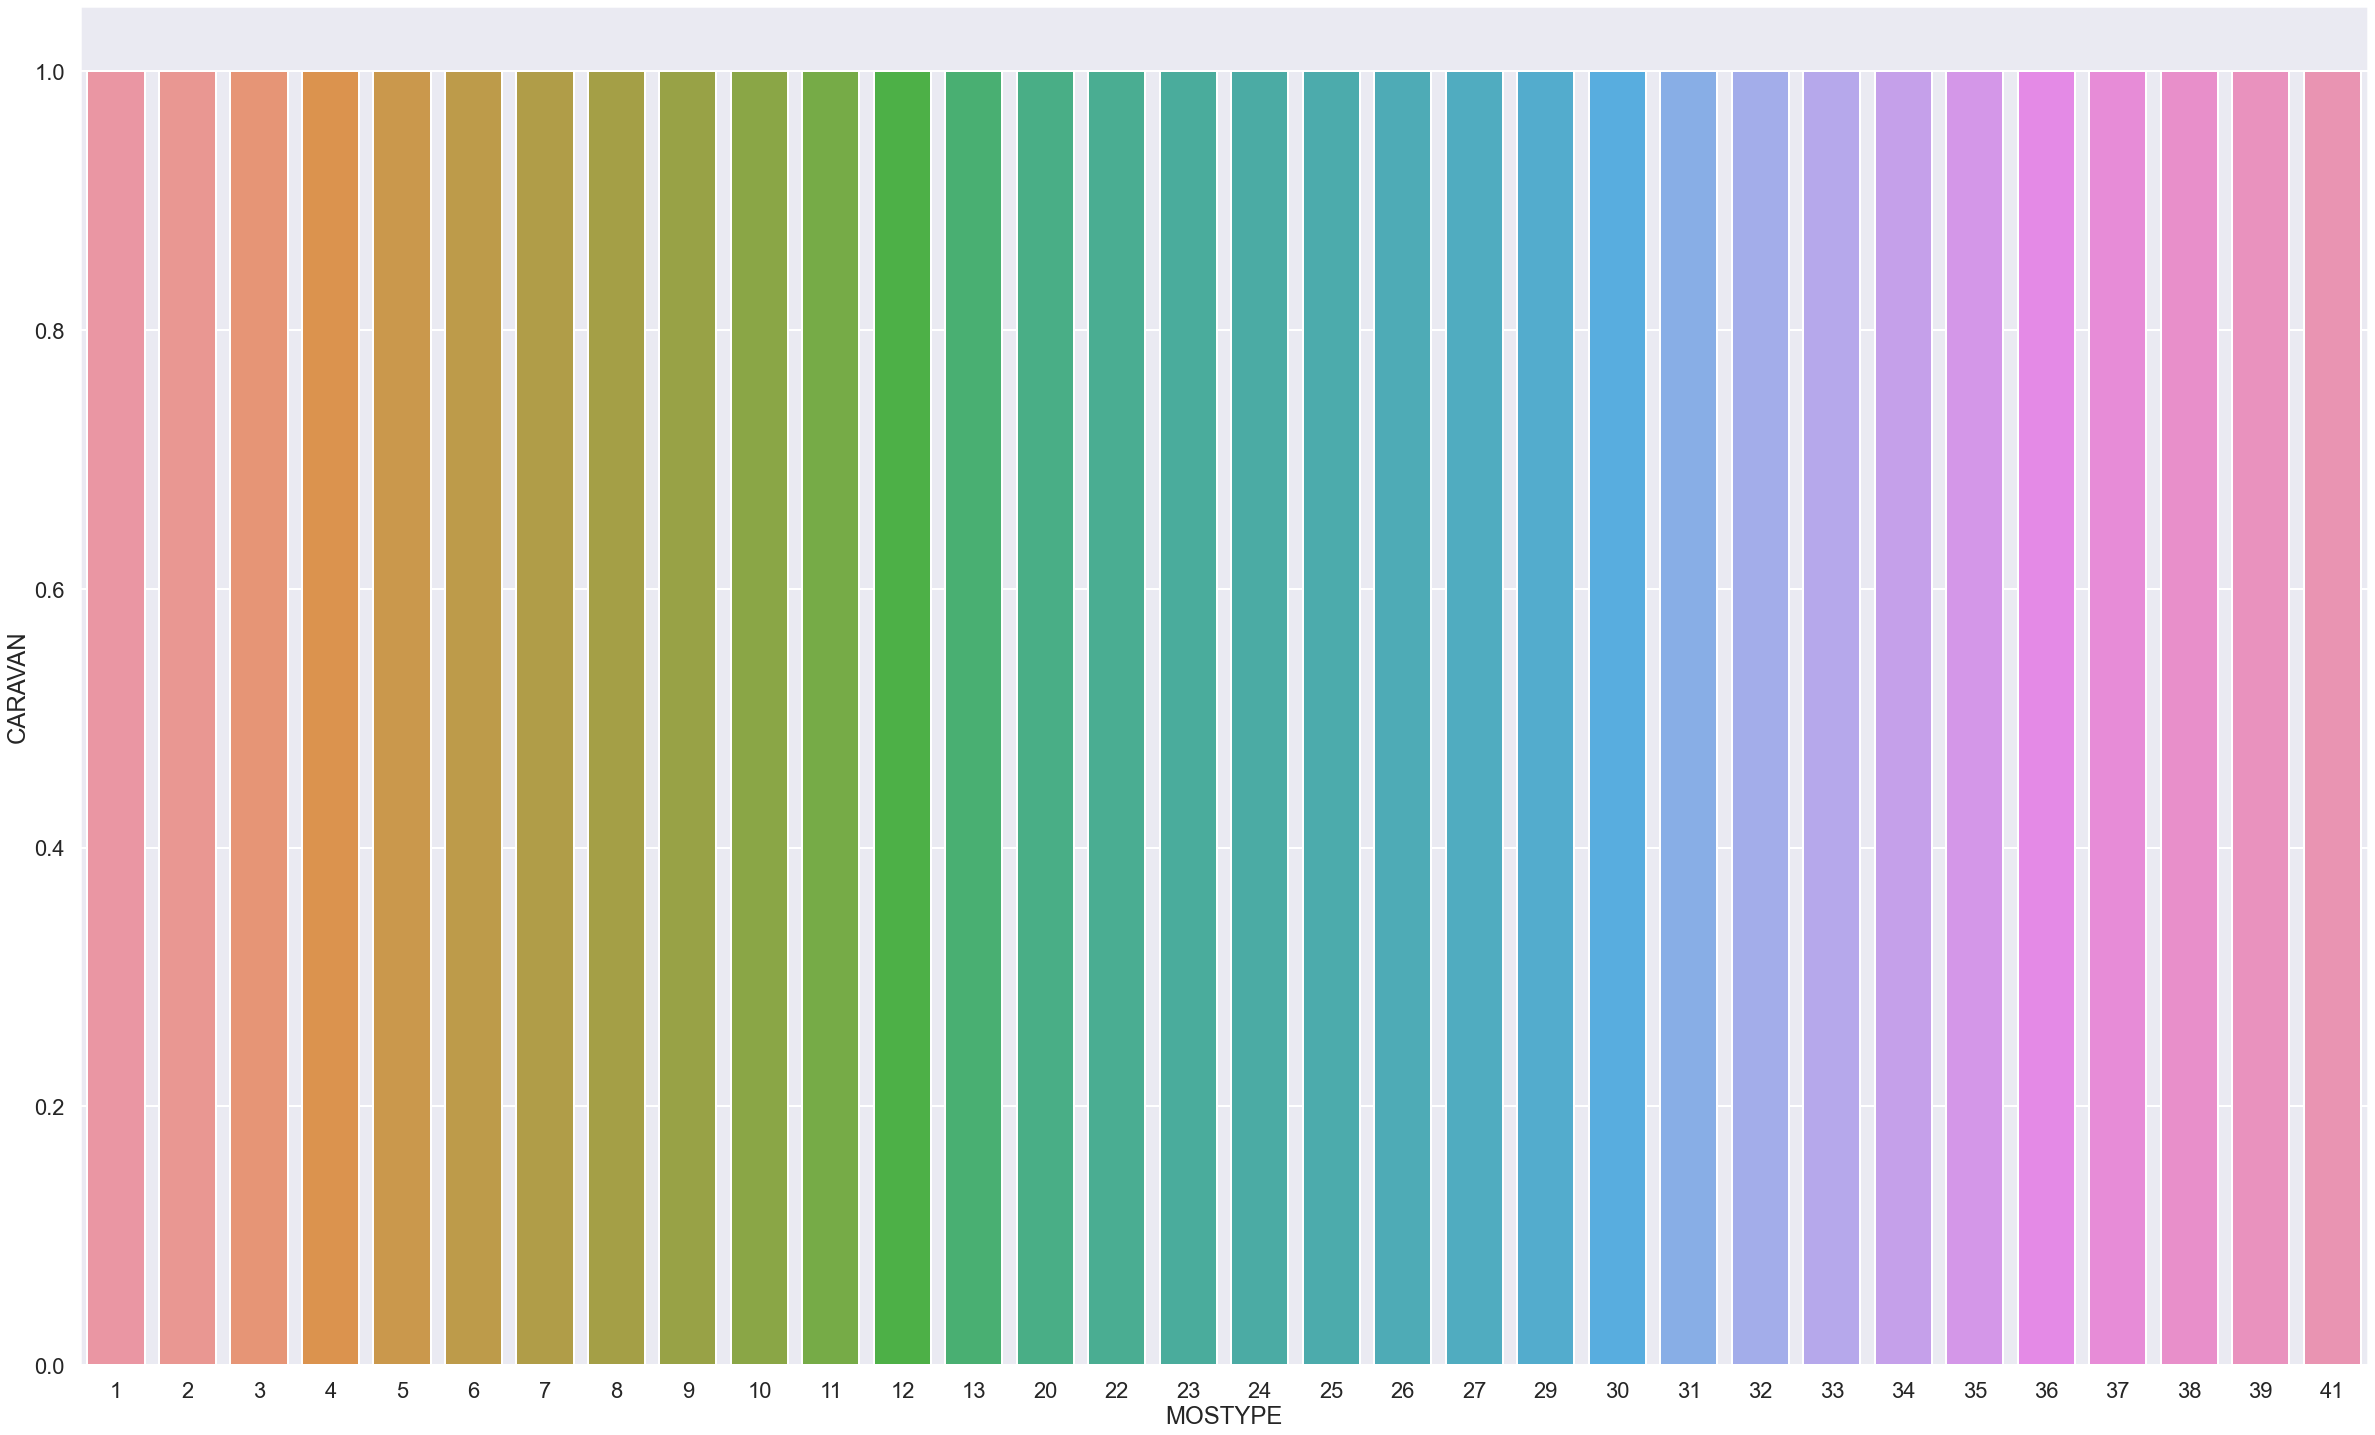

In [11]:
#Customber Subtype & Number of Mobile Home Policies
plt.figure(figsize=[41,25])
sns.barplot(x='MOSTYPE', y='CARAVAN', data=df1, )

In [12]:
#Avg Age & Mobile home policies

sns.barplot(x='Avg age see L1', y='Number of mobile home policies 0 - 1', data=df, )

ValueError: Could not interpret input 'Avg age see L1'

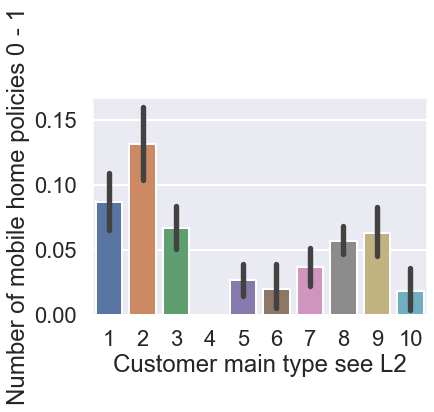

In [10]:
sns.barplot(x='Customer main type see L2', y='Number of mobile home policies 0 - 1', data=df, )

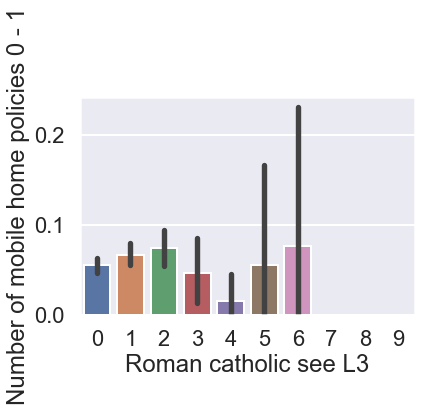

In [11]:
sns.barplot(x='Roman catholic see L3', y='Number of mobile home policies 0 - 1', data=df, )

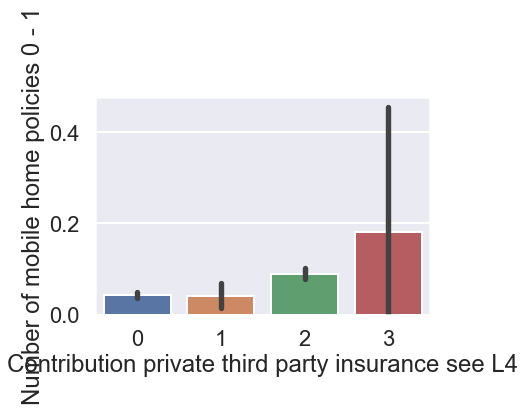

In [12]:
sns.barplot(x='Contribution private third party insurance see L4', y='Number of mobile home policies 0 - 1', data=df, )

# Lasso model to find import features

In [20]:
#Lasso using feature_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [64]:
X = df.iloc[:, 0:42]
y = df.iloc[:, -1]

feature_names = df.keys()
print(feature_names)

Index(['Customer Subtype L0', 'Number of houses 1 ñ 10',
       'Avg size household 1 ñ 6', 'Avg age see L1',
       'Customer main type see L2', 'Roman catholic see L3', 'Protestant',
       'Other religion', 'No religion', 'Married', 'Living together',
       'Other relation', 'Singles', 'Household without children',
       'Household with children', 'High level education',
       'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers',
       'Unskilled labourers', 'Social class A', 'Social class B1',
       'Social class B2', 'Social class C', 'Social class D', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance see L4'

In [77]:
clf = LassoCV(max_iter=10000,tol = .0001).fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

[6.15454963e-05 0.00000000e+00 0.00000000e+00 6.20882653e-03
 5.76149688e-04 2.16624206e-03 1.66088679e-03 9.14984315e-04
 1.93427082e-03 2.67039021e-03 2.27381109e-04 0.00000000e+00
 2.51860430e-04 1.24712550e-03 5.41074546e-04 5.70673728e-03
 0.00000000e+00 4.84252571e-03 0.00000000e+00 0.00000000e+00
 8.28611996e-03 2.10348702e-03 6.88497000e-04 0.00000000e+00
 0.00000000e+00 5.51304717e-04 0.00000000e+00 2.40238006e-03
 0.00000000e+00 3.22599286e-03 0.00000000e+00 2.47036646e-03
 0.00000000e+00 7.25783842e-04 0.00000000e+00 1.07698280e-03
 0.00000000e+00 1.01778117e-03 0.00000000e+00 1.30608837e-03
 8.82538402e-03 4.86972342e-03]


In [78]:
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

Selected features: ['Income >123.000' 'Farmer']


/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


IndexError: index 0 is out of bounds for axis 1 with size 0

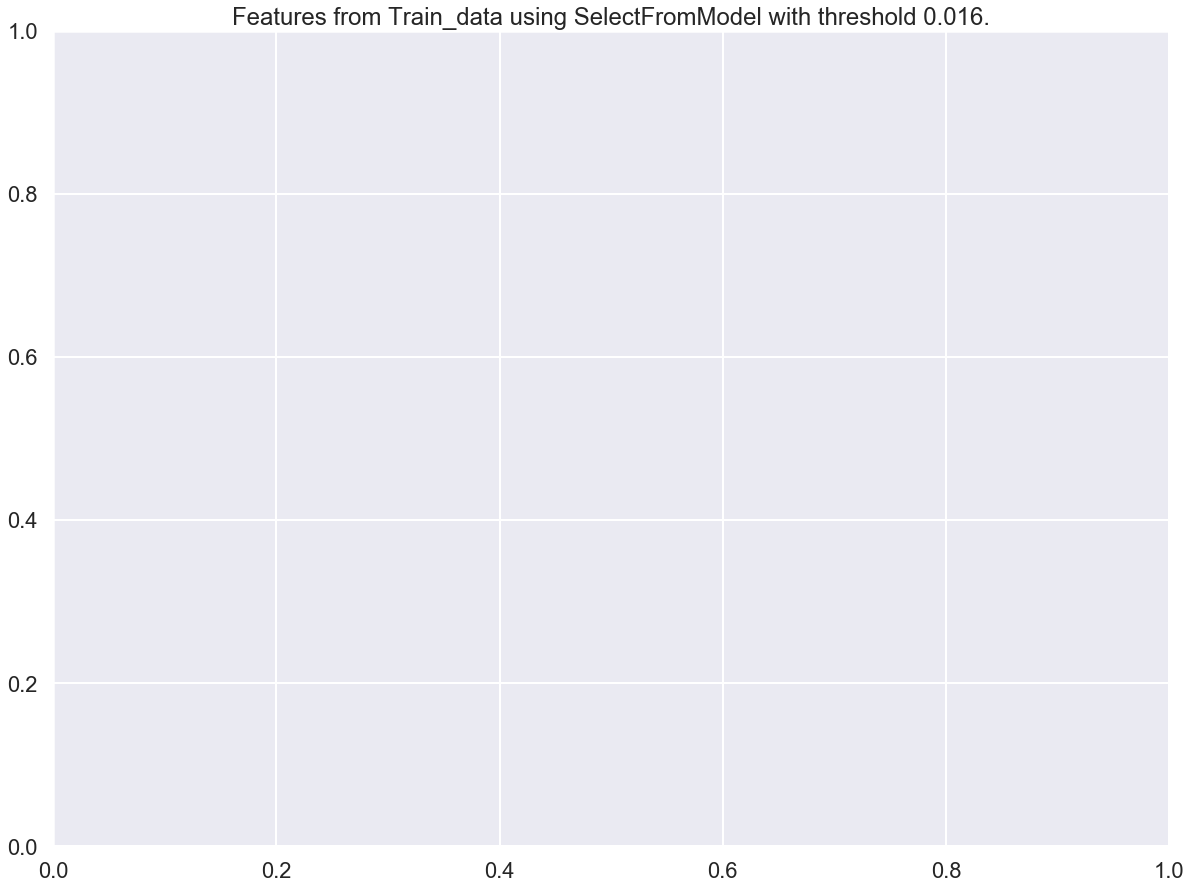

In [76]:
plt.figure(figsize = [20,15])
plt.title(
    "Features from Train_data using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, -1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [6]:
X = df.iloc[:, 0:85].values
y = df.iloc[:, 85].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# summarize the dataset
print(X.shape, y.shape)

In [ ]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))